In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image
from sklearn.model_selection import train_test_split

from cv2 import *
import cv2

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import *
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import to_categorical

In [6]:
fldr=r"C:\Users\hp\Documents\Age Gender Detection\UTKFace"
import os
flies=os.listdir(fldr)

In [7]:
images=[]
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    #print(total)
    image=cv2.imread(total) 
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image, (48,48))
    images.append(image)
print("images")

images


In [8]:
#appending the age of samples and also gender (0-male,1-female)
ages=[]
genders=[]
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

In [9]:
df = pd.DataFrame()
df['images'], df['ages'],df['genders'] = images, ages,genders
df.head()

,images,ages,genders
0,"[[[210, 201, 196], [192, 183, 176], [146, 137,...",100,0
1,"[[[121, 125, 136], [122, 126, 136], [111, 116,...",100,0
2,"[[[231, 235, 242], [153, 165, 188], [98, 116, ...",100,1
3,"[[[78, 82, 93], [78, 82, 93], [78, 82, 93], [7...",100,1
4,"[[[66, 70, 81], [68, 72, 83], [90, 94, 105], [...",100,1


10
0


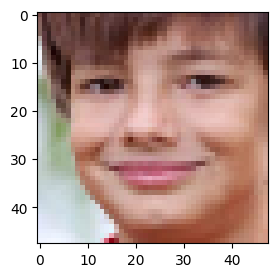

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(df['images'][51])
print(df['ages'][51])
print(df['genders'][51])
plt.show()


In [11]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='ages', ylabel='Density'>

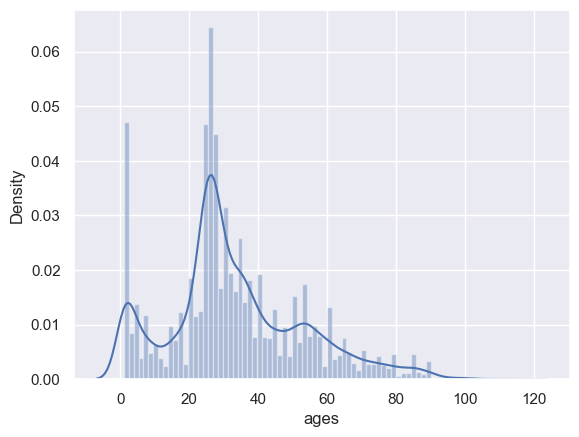

In [12]:
sns.set_theme()
sns.distplot(df['ages'],kde=True, bins=80)

In [14]:
import numpy as np
from PIL import Image

resized_images = []
for i in range(len(df)):
    img = Image.fromarray(df['images'].iloc[i])
    img_resized = img.resize((128, 128), Image.LANCZOS)
    img_array = np.asarray(img_resized)
    resized_images.append(img_array)
x = np.array(resized_images)
print("Resized images array shape:", x.shape)


Resized images array shape: (23708, 128, 128, 3)


In [15]:
df

,images,ages,genders
0,"[[[210, 201, 196], [192, 183, 176], [146, 137,...",100,0
1,"[[[121, 125, 136], [122, 126, 136], [111, 116,...",100,0
2,"[[[231, 235, 242], [153, 165, 188], [98, 116, ...",100,1
3,"[[[78, 82, 93], [78, 82, 93], [78, 82, 93], [7...",100,1
4,"[[[66, 70, 81], [68, 72, 83], [90, 94, 105], [...",100,1
...,...,...,...
23703,"[[[254, 255, 255], [252, 254, 253], [252, 254,...",9,1
23704,"[[[1, 1, 1], [1, 1, 3], [1, 0, 4], [4, 3, 9], ...",9,1
23705,"[[[217, 208, 197], [211, 208, 188], [197, 199,...",9,1
23706,"[[[7, 9, 7], [7, 9, 8], [6, 10, 11], [9, 14, 1...",9,1


In [16]:
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, df['ages'], test_size=0.2, random_state=42)

In [17]:
y_train_age

5096     25
19586    56
9835     29
13631    35
9807     29
         ..
21575    68
5390     25
860      16
15795    40
23654     9
Name: ages, Length: 18966, dtype: int64

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential, regularizers, optimizers
from tensorflow.keras.layers import Flatten, Dense

# Load the VGG16 model, without the top dense layers and with pre-trained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model to prevent its weights from being updated during training
base_model.trainable = False

# Initialize the Sequential model
agemodel = Sequential()

# Add the VGG16 base model to the Sequential model
agemodel.add(base_model)

# Add custom layers for age prediction
agemodel.add(Flatten())
agemodel.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
agemodel.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
agemodel.add(Dense(1, activation='relu'))

# Compile the model
agemodel.compile(loss='mae',
                 optimizer=optimizers.Adam(learning_rate=0.0001),  # Corrected 'lr' to 'learning_rate'
                 metrics=['mae'])

# Print the model summary
agemodel.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
checkpoint = ModelCheckpoint(filepath=f"age_model_checkpoint.keras",
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1
                            )

In [21]:
tensorboard = TensorBoard("cnn_logs")

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rescale=1./255.,rotation_range=20, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train2 = datagen.flow(x_train_age, y_train_age, batch_size=64)
test2 = test_datagen.flow(x_test_age,y_test_age, batch_size  =64)

In [61]:
%load_ext tensorboard

In [25]:
history1 = agemodel.fit(train2, epochs=20, shuffle= True, validation_data=test2,callbacks =[checkpoint,tensorboard])

Epoch 1/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1503s 5s/step - loss: 27.1738 - mae: 18.1271 - val_loss: 14.3849 - val_mae: 10.4447
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1517s 5s/step - loss: 13.8089 - mae: 10.3050 - val_loss: 12.0182 - val_mae: 9.3830
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1631s 5s/step - loss: 12.0570 - mae: 9.5763 - val_loss: 11.0479 - val_mae: 8.9237
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1399s 5s/step - loss: 11.1130 - mae: 9.0658 - val_loss: 10.9108 - val_mae: 9.0535
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1377s 5s/step - loss: 10.7387 - mae: 8.9273 - val_loss: 10.2454 - val_mae: 8.5571
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1378s 5s/step - loss: 10.3617 - mae: 8.7045 - val_loss: 9.8578 - val_mae: 8.2819
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1612s 5s/step - loss: 9.9653 - mae: 8.4128 - val_loss: 9.6705 - val_mae: 8.1851
Epoch 8/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1603s 5s/step - loss: 9.7481 - mae: 8.2798 - val_loss: 9.7041 - val_mae: 8.2859
Epoch 9/20
297/297 ━━━━━━━

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(agemodel, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [28]:
agemodel.save('model_pretrain.h5')

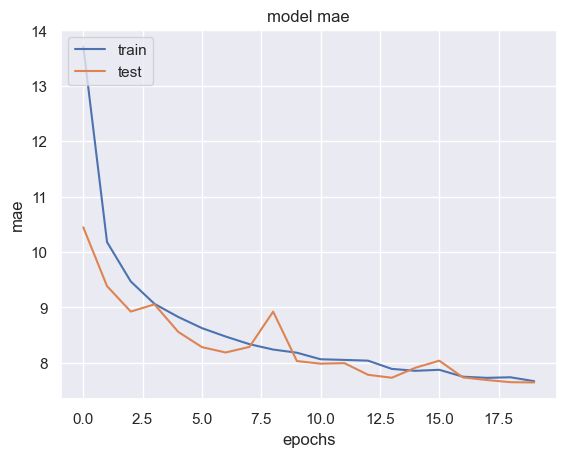

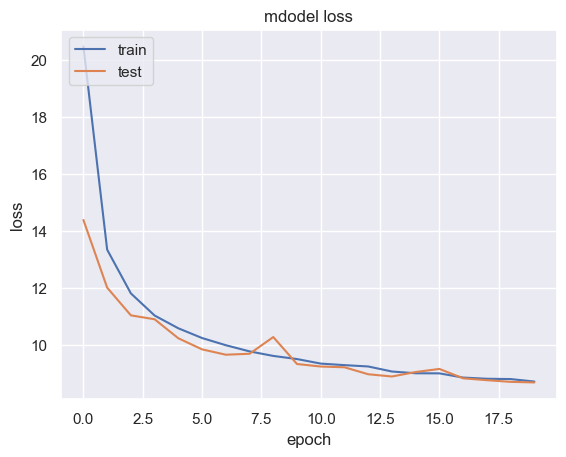

In [29]:
from matplotlib import pyplot as plt
plt.plot(history1.history['mae'])
plt.plot(history1.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epochs')
plt.legend(['train','test'],loc= 'upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('mdodel loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [30]:
agemodel.save('model_pretrain.keras')

In [31]:
loss, mae = agemodel.evaluate(test2, verbose=0)
print('Test loss: {}'.format(loss))
print('Test mae: {}'.format(mae))

Test loss: 8.700206756591797
Test mae: 7.644054412841797


In [32]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((128,128), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((128,128), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((128,128), Image.ANTIALIAS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 128, 128, 3)
    
    age = agemodel.predict(ar)
        
    print('Age:', int(age))
    return im.resize((300,300), Image.ANTIALIAS)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
22


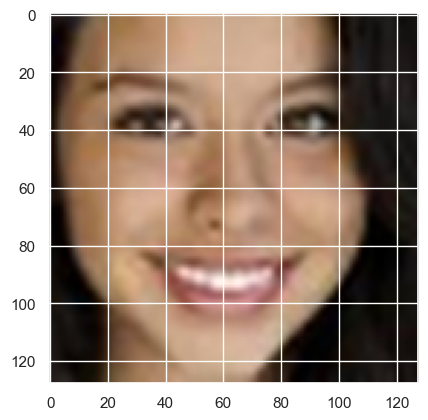

In [33]:
age = agemodel.predict(x_test_age[250].reshape(-1,128,128,3)/255.)
age_pred= tf.round(age)
print(int(age))
plt.imshow(x_test_age[250]) 